In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
%matplotlib inline

In [27]:
data = pd.read_pickle("C:/Users/amankovs/Documents/Src/data/data.pkl")

In [28]:
data

,feature1,feature2,feature3,timestamp,dayofmonth,month,week,weekday,hour,dayofweek,wait,run,rate
0,A,critical_pp,C/D/E/F/G,2020-04-01 00:00:00,1,4,14,True,0,4,4.0,469.0,41.0
1,B,normal_pp,H/I,2020-04-01 00:00:00,1,4,14,True,0,4,160.0,205.0,2.0
2,B,normal_pp,H/J,2020-04-01 00:00:00,1,4,14,True,0,4,203.0,205.0,72.0
3,A,normal_pp,K,2020-04-01 00:00:00,1,4,14,True,0,4,608.0,38.0,133.0
4,B,express_pp,L/M,2020-04-01 00:00:00,1,4,14,True,0,4,80.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,B,express_pp,O/P,2020-08-31 23:00:00,31,8,36,True,23,2,58.0,17.0,47.0
55076,B,normal_pp,O/P,2020-08-31 23:00:00,31,8,36,True,23,2,341.0,29.0,6.0
55077,B,normal_pp,H/X,2020-08-31 23:00:00,31,8,36,True,23,2,9.0,299.0,9.0
55078,A,flex_critical_pp,W,2020-08-31 23:00:00,31,8,36,True,23,2,182.0,279.0,3.0


In [23]:
data.shape

(55080, 13)

In [24]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'timestamp', 'dayofmonth', 'month',
       'week', 'weekday', 'hour', 'dayofweek', 'wait', 'run', 'rate'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0      int64
qslot          object
pool           object
queue          object
dayofmonth      int64
month           int64
week            int64
hour            int64
dayofweek       int64
timestamp      object
wait          float64
run           float64
rate          float64
weekday          bool
dtype: object

In [7]:
data['pool'].value_counts()

B    36720
A    18360
Name: pool, dtype: int64

In [8]:
data['qslot'].value_counts()

O/P          7344
L/M          7344
H/N          7344
W            3672
C/D/E/T/U    3672
H/I          3672
Q/R/S        3672
H/V          3672
C/D/E/F/G    3672
H/J          3672
K            3672
H/X          3672
Name: qslot, dtype: int64

In [9]:
data['queue'].value_counts()

normal_pp           33048
express_pp           7344
critical_pp          3672
soft_pp              3672
short_pp             3672
flex_critical_pp     3672
Name: queue, dtype: int64

In [10]:
counter = 0
for name,group in data.groupby(['qslot', 'pool', 'queue']):
    counter += 1
print(counter)

15


In [11]:
data[data['pool'] == 'A']['queue'].value_counts()

normal_pp           7344
critical_pp         3672
short_pp            3672
flex_critical_pp    3672
Name: queue, dtype: int64

In [12]:
data[data['pool'] == 'B']['queue'].value_counts()

normal_pp     25704
express_pp     7344
soft_pp        3672
Name: queue, dtype: int64

In [13]:
data[data['pool'] == 'A']['qslot'].value_counts()

W            3672
C/D/E/T/U    3672
K            3672
C/D/E/F/G    3672
Q/R/S        3672
Name: qslot, dtype: int64

In [14]:
data[data['pool'] == 'B']['qslot'].value_counts()

O/P    7344
L/M    7344
H/N    7344
H/I    3672
H/J    3672
H/V    3672
H/X    3672
Name: qslot, dtype: int64

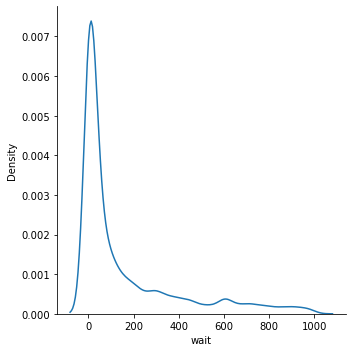

In [15]:
sns.displot(data[data['wait']<1000], x='wait', kind="kde")

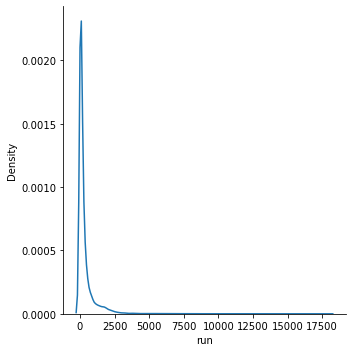

In [16]:
sns.displot(data, x="run", kind="kde")

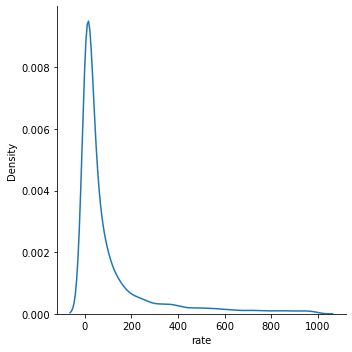

In [17]:
sns.displot(data[data['rate']<1000], x="rate", kind="kde")

In [18]:
data[data['wait']==0].shape

(416, 14)

In [19]:
data[data['run']==0].shape

(68, 14)

In [20]:
data[data['rate']==0].shape

(86, 14)

In [21]:
sns.set_theme(rc={'figure.figsize':(11,9)},font_scale=1.5,style="whitegrid")

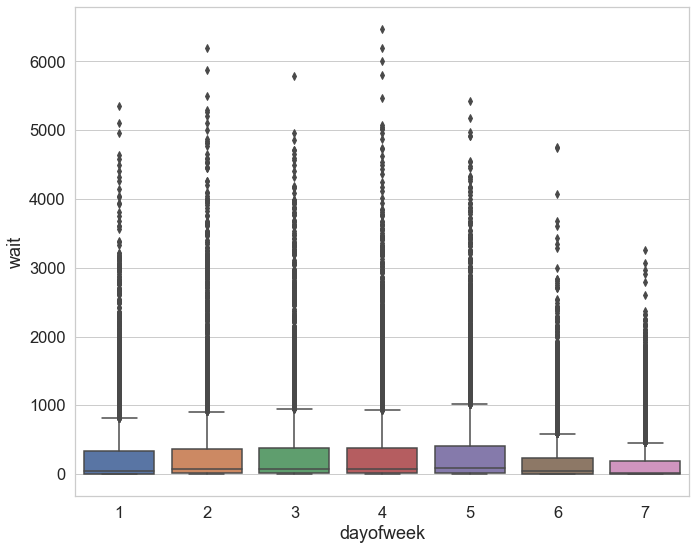

In [22]:
ax = sns.boxplot(x="dayofweek", y="wait", data=data)

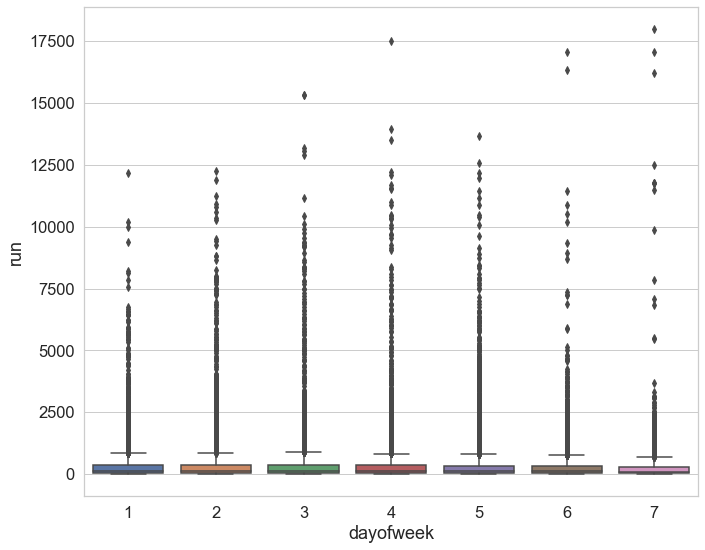

In [23]:
ax = sns.boxplot(x="dayofweek", y="run", data=data)

<AxesSubplot:xlabel='dayofweek', ylabel='rate'>

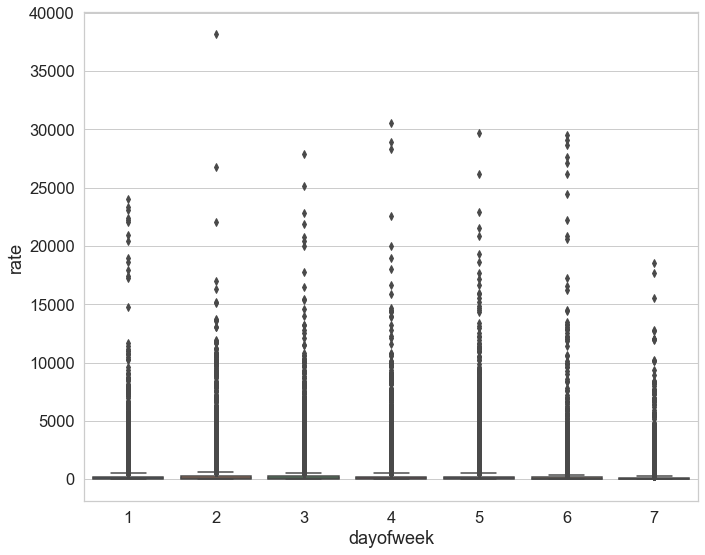

In [24]:
sns.boxplot(x="dayofweek", y="rate", data=data)

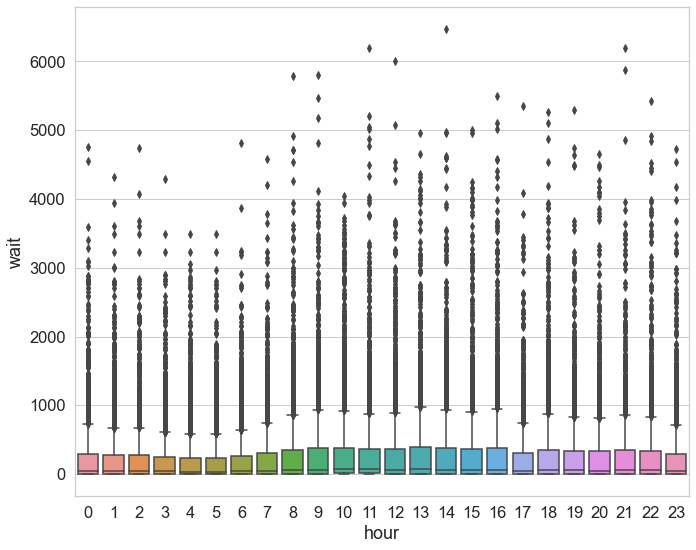

In [25]:
ax = sns.boxplot(x="hour", y="wait", data=data)

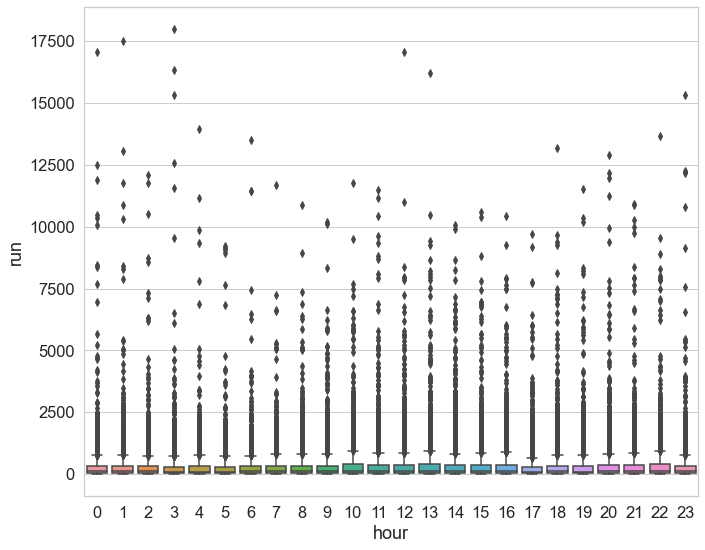

In [26]:
ax = sns.boxplot(x="hour", y="run", data=data)

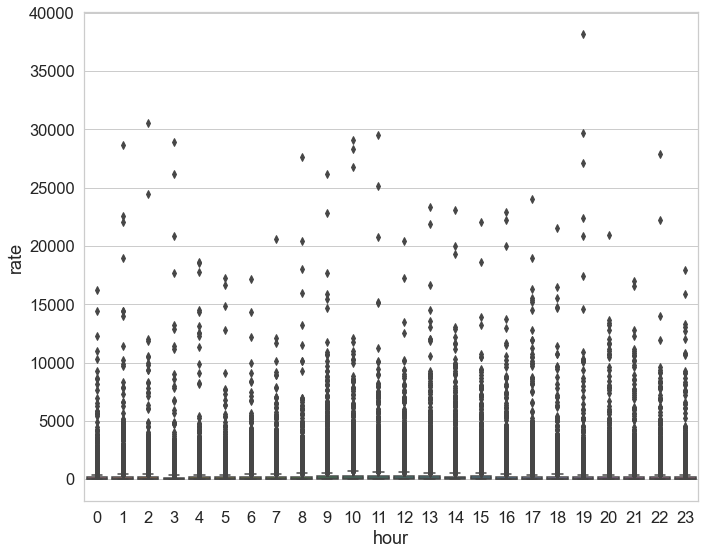

In [27]:
ax = sns.boxplot(x="hour", y="rate", data=data)

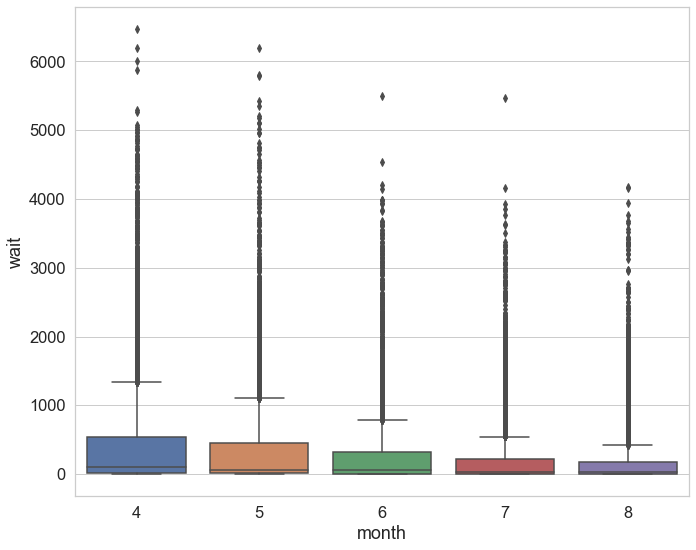

In [28]:
ax = sns.boxplot(x="month", y="wait", data=data)

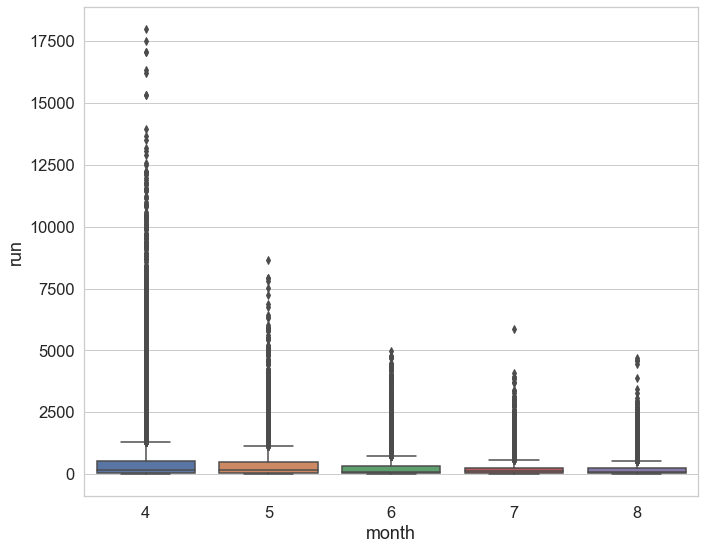

In [29]:
ax = sns.boxplot(x="month", y="run", data=data)

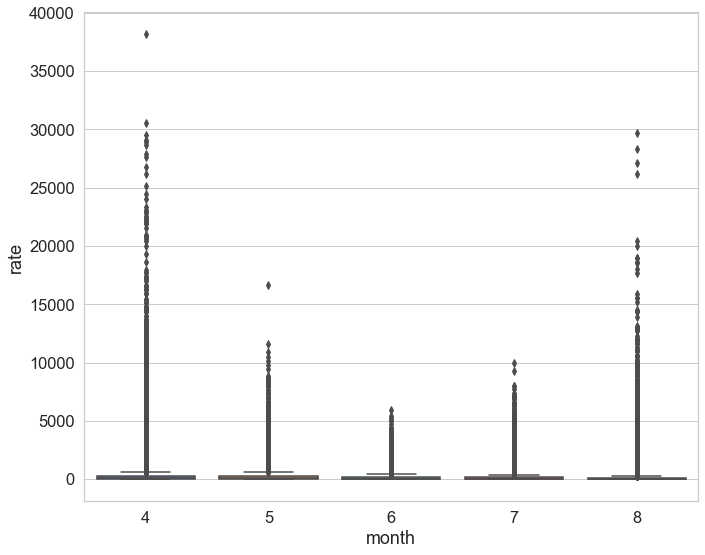

In [30]:
ax = sns.boxplot(x="month", y="rate", data=data)

<AxesSubplot:xlabel='dayofweek', ylabel='wait'>

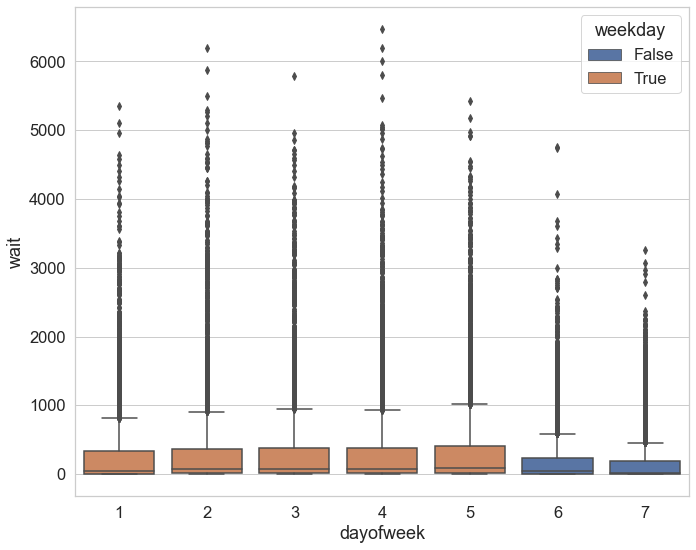

In [31]:
sns.boxplot(x="dayofweek", y="wait", hue="weekday",
                 data=data, dodge=False)

<AxesSubplot:xlabel='dayofweek', ylabel='run'>

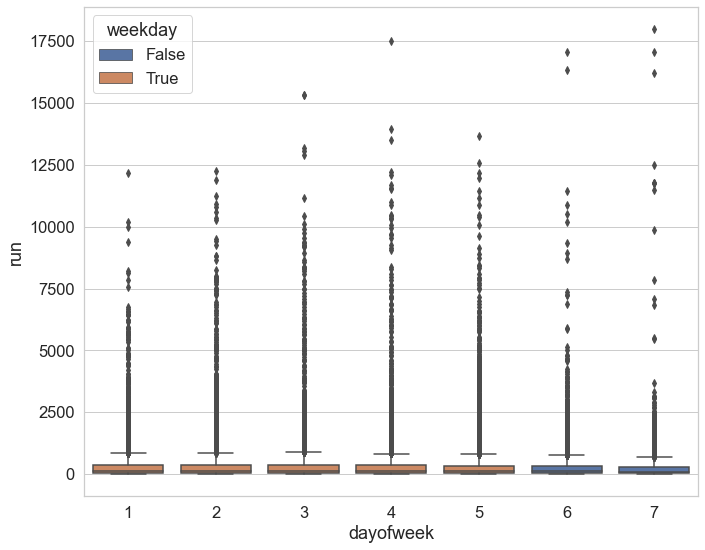

In [32]:
sns.boxplot(x="dayofweek", y="run", hue="weekday",
                 data=data, dodge=False)

<AxesSubplot:xlabel='dayofweek', ylabel='rate'>

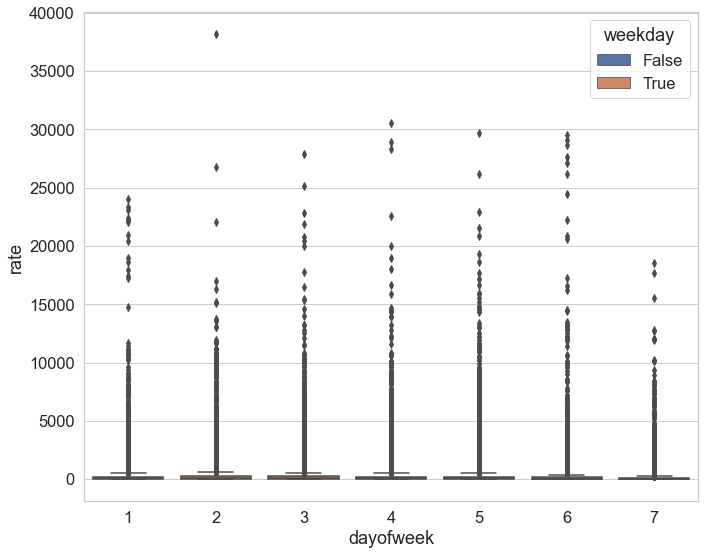

In [33]:
sns.boxplot(x="dayofweek", y="rate", hue="weekday",
                 data=data, dodge=False)

1. In our case we have zeroes, and many values not far from Zero, which we may consider as Zero.
2. Tailed right, skewed distribution

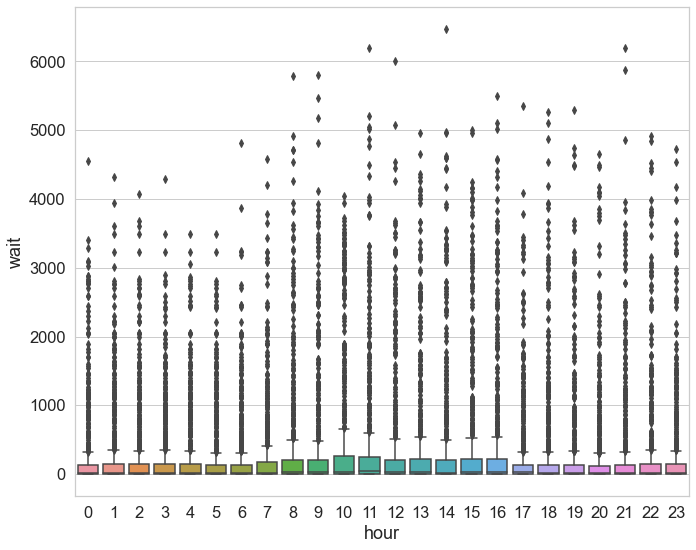

In [34]:
ax = sns.boxplot(x="hour", y="wait", data=data[data['pool']=='A'])

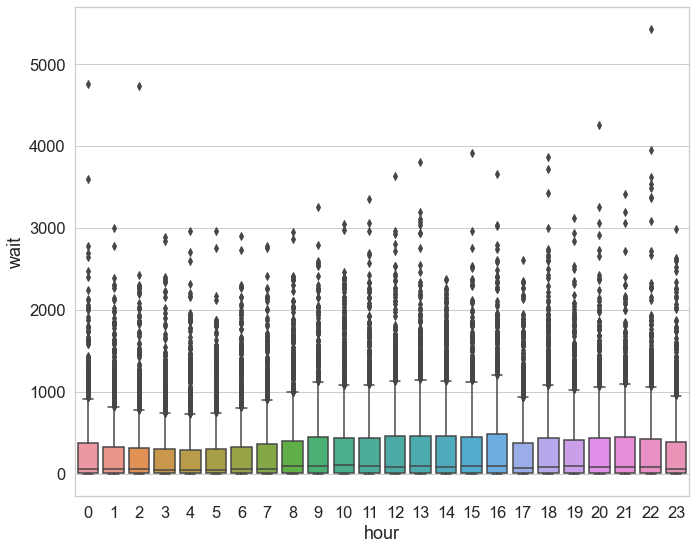

In [35]:
ax = sns.boxplot(x="hour", y="wait", data=data[data['pool']=='B'])

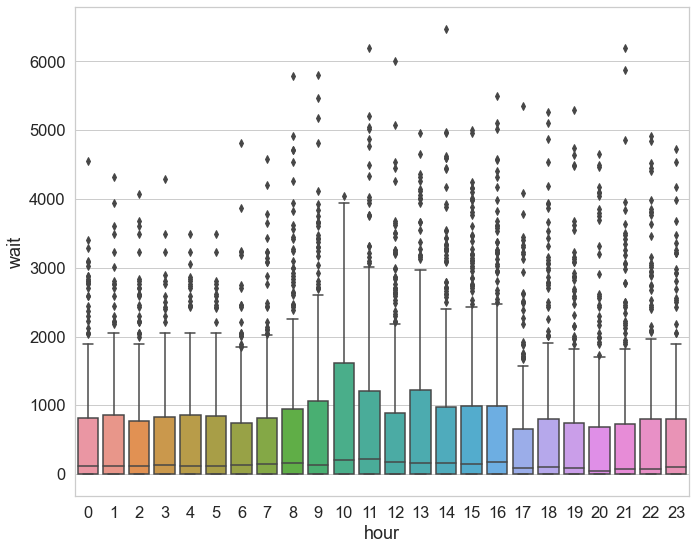

In [36]:
ax = sns.boxplot(x="hour", y="wait", data=data[(data['pool']=='A') & (data['queue']=='normal_pp')])

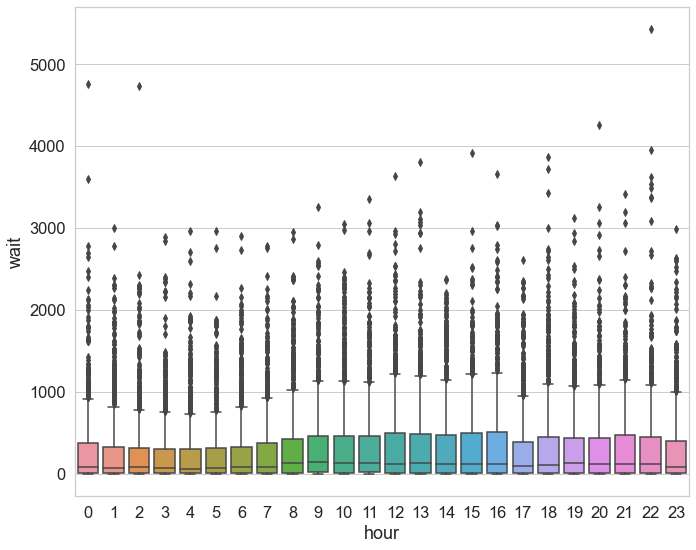

In [37]:
ax = sns.boxplot(x="hour", y="wait", data=data[(data['pool']=='B') & (data['queue']=='normal_pp')])

Only normal is common to pool A and B so all other are not indicative at all
We will turn normal PP to a column

In [38]:
data

,Unnamed: 0,qslot,pool,queue,dayofmonth,month,week,hour,dayofweek,timestamp,wait,run,rate,weekday
0,0,C/D/E/F/G,A,critical_pp,1,4,14,0,4,2020-04-01 00:00:00,4.0,469.0,41.0,True
1,0,H/I,B,normal_pp,1,4,14,0,4,2020-04-01 00:00:00,160.0,205.0,2.0,True
2,0,H/J,B,normal_pp,1,4,14,0,4,2020-04-01 00:00:00,203.0,205.0,72.0,True
3,374,K,A,normal_pp,1,4,14,0,4,2020-04-01 00:00:00,608.0,38.0,133.0,True
4,0,L/M,B,express_pp,1,4,14,0,4,2020-04-01 00:00:00,80.0,4.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,3599,O/P,B,express_pp,31,8,36,23,2,2020-08-31 23:00:00,58.0,17.0,47.0,True
55076,3599,O/P,B,normal_pp,31,8,36,23,2,2020-08-31 23:00:00,341.0,29.0,6.0,True
55077,671,H/X,B,normal_pp,31,8,36,23,2,2020-08-31 23:00:00,9.0,299.0,9.0,True
55078,3599,W,A,flex_critical_pp,31,8,36,23,2,2020-08-31 23:00:00,182.0,279.0,3.0,True
